# Afterclass Clase 11

### Poner a grabar

- Estandarización

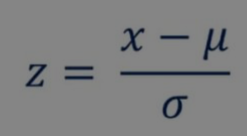

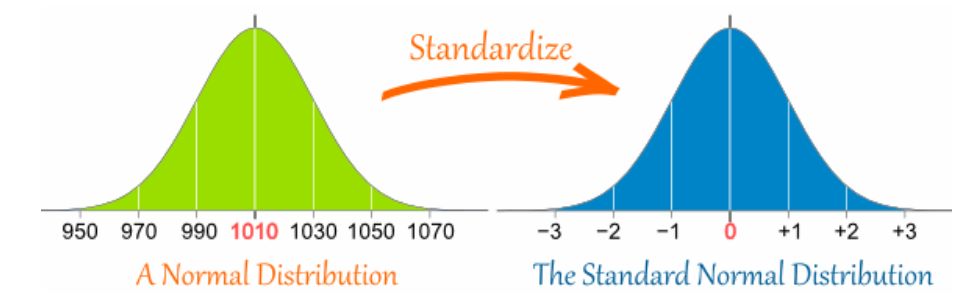

In [36]:
import numpy as np

x = np.random.rand(1000)

(array([ 97., 112., 103., 105., 100.,  89., 107., 103.,  98.,  86.]),
 array([5.55599314e-04, 1.00445554e-01, 2.00335508e-01, 3.00225463e-01,
        4.00115417e-01, 5.00005372e-01, 5.99895326e-01, 6.99785280e-01,
        7.99675235e-01, 8.99565189e-01, 9.99455144e-01]),
 <a list of 10 Patch objects>)

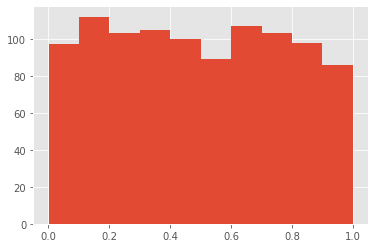

In [38]:
plt.hist(x)

(array([ 97., 112., 103., 105., 100.,  89., 107., 103.,  98.,  86.]),
 array([-1.71900854, -1.3679859 , -1.01696326, -0.66594062, -0.31491797,
         0.03610467,  0.38712731,  0.73814995,  1.08917259,  1.44019523,
         1.79121787]),
 <a list of 10 Patch objects>)

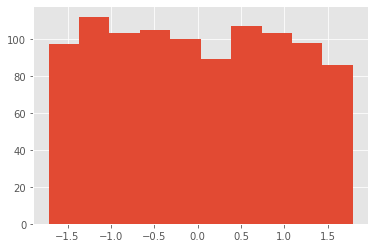

In [42]:
y = (x-np.mean(x))/np.std(x)
plt.hist(y)

https://heartbeat.fritz.ai/understanding-the-mathematics-behind-principal-component-analysis-efd7c9ff0bb3

# PCA

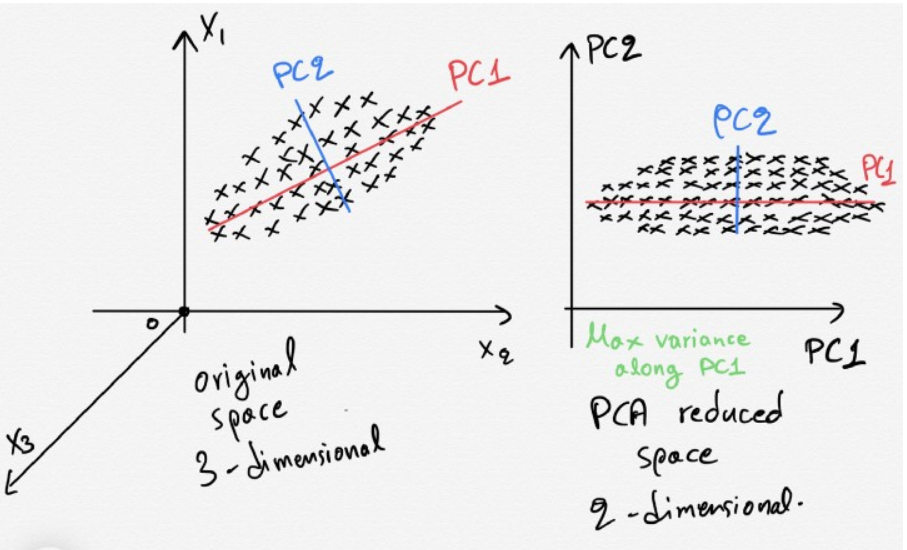

In [43]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
import seaborn as sns
from sklearn.decomposition import PCA
import pandas as pd
from sklearn.preprocessing import StandardScaler
plt.style.use('ggplot')

# Load the data
df = sns.load_dataset('iris')


In [44]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [46]:
X = df.drop(columns='species')
y = df['species']

In [49]:
X

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


# Escalamos

In [50]:
# Z-score the features
scaler = StandardScaler()
scaler.fit(X)


StandardScaler()

In [ ]:
X_scale = scaler.transform(X)

In [53]:
X_scale

array([[-9.00681170e-01,  1.01900435e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00, -1.31979479e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.38535265e+00,  3.28414053e-01, -1.39706395e+00,
        -1.31544430e+00],
       [-1.50652052e+00,  9.82172869e-02, -1.28338910e+00,
        -1.31544430e+00],
       [-1.02184904e+00,  1.24920112e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-5.37177559e-01,  1.93979142e+00, -1.16971425e+00,
        -1.05217993e+00],
       [-1.50652052e+00,  7.88807586e-01, -1.34022653e+00,
        -1.18381211e+00],
       [-1.02184904e+00,  7.88807586e-01, -1.28338910e+00,
        -1.31544430e+00],
       [-1.74885626e+00, -3.62176246e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00,  9.82172869e-02, -1.28338910e+00,
        -1.44707648e+00],
       [-5.37177559e-01,  1.47939788e+00, -1.28338910e+00,
        -1.31544430e+00],
       [-1.26418478e+00,  7.88807586e-01, -1.22655167e+00,
      

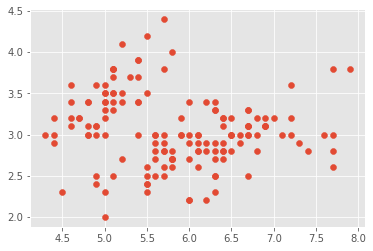

In [56]:
plt.scatter(X['sepal_length'], X['sepal_width'])

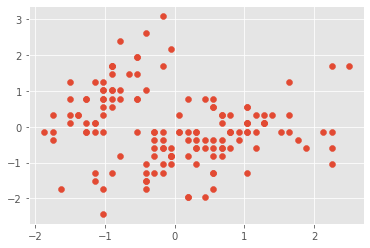

In [57]:
plt.scatter(X_scale[:,0], X_scale[:,1])

# Hacemos PCA

In [ ]:
# The PCA model
pca = PCA() # estimate only 2 PCs
X_new = pca.fit_transform(X_scale) # project the original data into the PCA space

In [59]:
X_new.shape

(150, 4)

In [60]:
X.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width'], dtype='object')

In [63]:
df_pca = pd.DataFrame(X_new, columns = ['PC-1', 'PC-2', 'PC-3', 'PC-4'])

In [64]:
df_pca

,PC-1,PC-2,PC-3,PC-4
0,-2.264703,0.480027,-0.127706,-0.024168
1,-2.080961,-0.674134,-0.234609,-0.103007
2,-2.364229,-0.341908,0.044201,-0.028377
3,-2.299384,-0.597395,0.091290,0.065956
4,-2.389842,0.646835,0.015738,0.035923
...,...,...,...,...
145,1.870503,0.386966,0.256274,-0.389257
146,1.564580,-0.896687,-0.026371,-0.220192
147,1.521170,0.269069,0.180178,-0.119171
148,1.372788,1.011254,0.933395,-0.026129


In [66]:
df['speciesn'] = df.species.map( {'setosa':0 , 'versicolor':1, 'virginica':2} )

In [67]:
df.species

0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: species, Length: 150, dtype: object

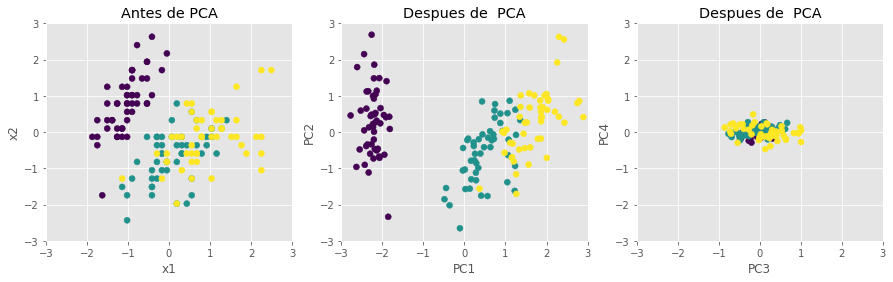

In [74]:
fig, axes = plt.subplots(1,3,figsize=(15,4))
axes[0].scatter(X_scale[:,0], X_scale[:,1], c=df.speciesn.values)
axes[0].set_xlabel('x1')
axes[0].set_ylabel('x2')
axes[0].set_title('Antes de PCA')
axes[0].set_xlim(-3,3)
axes[0].set_ylim(-3,3)

axes[1].scatter(X_new[:,0], X_new[:,1], c=df.speciesn.values)
axes[1].set_xlabel('PC1')
axes[1].set_ylabel('PC2')
axes[1].set_title('Despues de  PCA')
axes[1].set_xlim(-3,3)
axes[1].set_ylim(-3,3)


axes[2].scatter(X_new[:,2], X_new[:,3], c=df.speciesn.values)
axes[2].set_xlabel('PC3')
axes[2].set_ylabel('PC4')
axes[2].set_title('Despues de  PCA')
axes[2].set_xlim(-3,3)
axes[2].set_ylim(-3,3)

plt.show()

In [75]:
pca.explained_variance_ratio_

array([0.72962445, 0.22850762, 0.03668922, 0.00517871])

In [76]:
pca.components_,

(array([[ 0.52106591, -0.26934744,  0.5804131 ,  0.56485654],
        [ 0.37741762,  0.92329566,  0.02449161,  0.06694199],
        [-0.71956635,  0.24438178,  0.14212637,  0.63427274],
        [-0.26128628,  0.12350962,  0.80144925, -0.52359713]]),)

In [14]:
df_components = pd.DataFrame(pca.components_,columns=df.iloc[:,:4].columns,index = ['PC-1','PC-2','PC-3','PC-4'])
df_components

,sepal_length,sepal_width,petal_length,petal_width
PC-1,0.521066,-0.269347,0.580413,0.564857
PC-2,0.377418,0.923296,0.024492,0.066942
PC-3,-0.719566,0.244382,0.142126,0.634273
PC-4,-0.261286,0.123510,0.801449,-0.523597


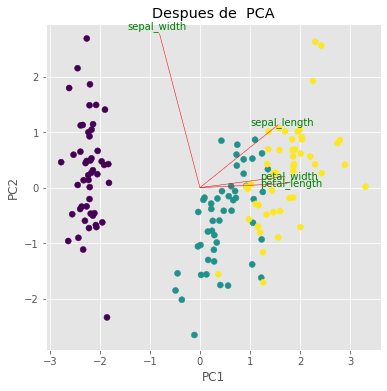

In [31]:
fig, axes = plt.subplots(1,1,figsize=(6,6))

axes.scatter(X_new[:,0], X_new[:,1], c=df.speciesn.values)
axes.set_xlabel('PC1')
axes.set_ylabel('PC2')
axes.set_title('Despues de  PCA')
coeff = np.transpose(pca.components_[0:2, :])
n = coeff.shape[0]
for i in range(n):
        plt.arrow(0, 0, coeff[i,0]*3, coeff[i,1]*3,color='r',alpha=0.5) 
        #if labels is None:
        plt.text(coeff[i,0]* 3.15, coeff[i,1] * 3.15, X.columns[i], color='g', ha='center', va='center')
        #else:
            #plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color='g', ha='center', va='center')

In [29]:
pca.components_.shape

(4, 4)

In [19]:
X.columns[0]

'sepal_length'